<a href="https://colab.research.google.com/github/Gabriel-Paes/ml-classification/blob/main/decision_tree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report



In [2]:
# Carregando o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target



In [3]:
# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Pré-processamento: Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [5]:
# Inicializando o classificador de Árvore de Decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
dt_classifier.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = dt_classifier.predict(X_test_scaled)



In [6]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)



In [7]:
# Exibindo os resultados
print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



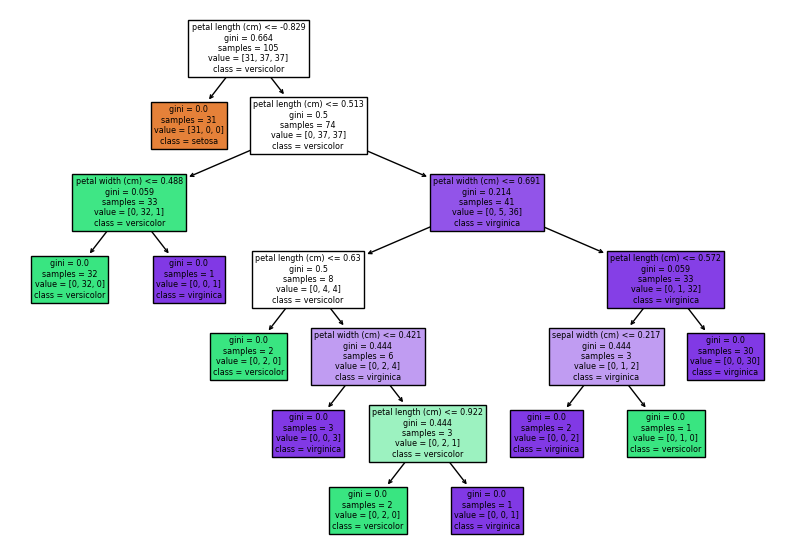

In [8]:
# Plotando a árvore de decisão
plt.figure(figsize=(10,7))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

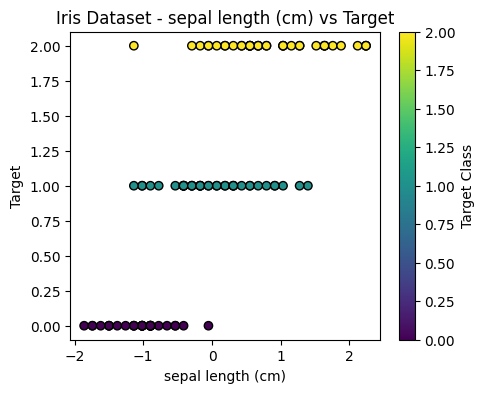

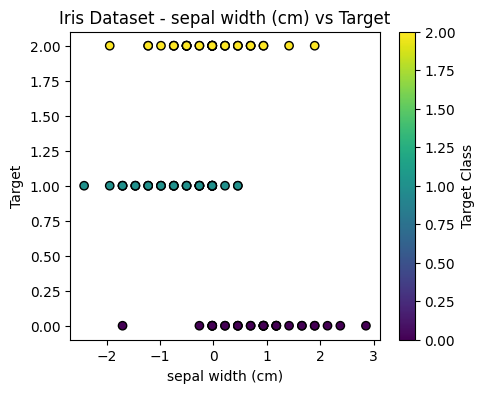

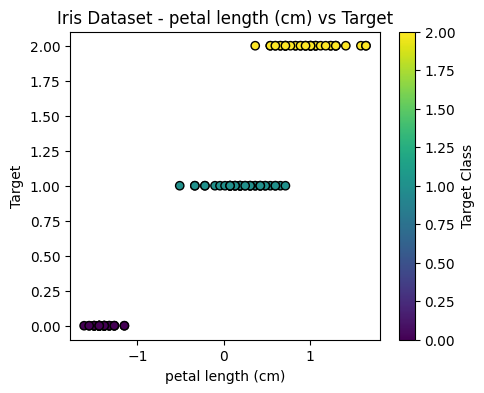

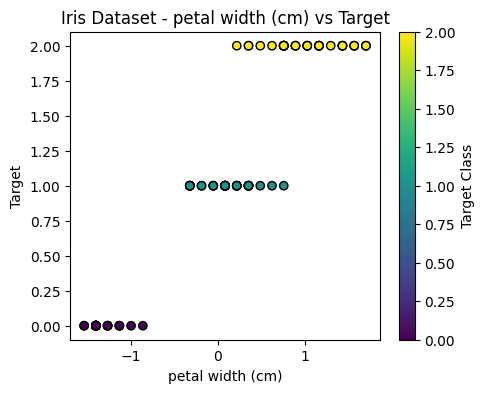

In [9]:
# Plotando gráficos de dispersão para as características dos dados
for feature_index in range(X_train_scaled.shape[1]):
    plt.figure(figsize=(5, 4))
    plt.scatter(X_train_scaled[:, feature_index], y_train, c=y_train, cmap='viridis', edgecolor='k')
    plt.xlabel(iris.feature_names[feature_index])
    plt.ylabel('Target')
    plt.title(f'Iris Dataset - {iris.feature_names[feature_index]} vs Target')
    plt.colorbar(label='Target Class')
    plt.show()

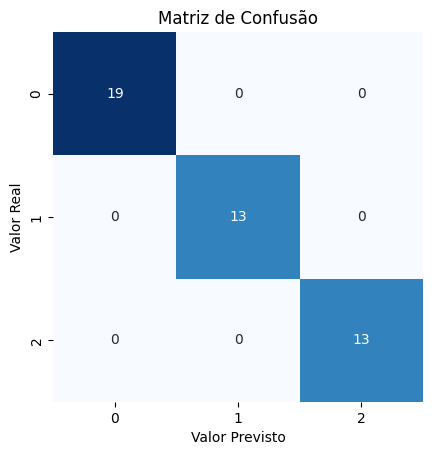

Acurácia: 1.0


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Obtendo os valores da matriz de confusão
#tn, fp, fn, tp = cm.ravel()

# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Exibindo a acurácia
print('Acurácia:', accuracy)